In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Works with minimum distance from new problem instances to training instances to determine the classification of new instances/datapoints. Eg: Given a set of features, assign the overall set to a specific class (Euclidean distance is the distance metric used) 

#### So for each data point, we will be looking at the 'K' nearest training data points (K = int, specified by user) and take the most frequently occuring classes and assign that class to testing data.

#### Dataset is 'heart.csv' obtained from Kaggle. The goal is to specify whether a new sample entails patient heart disease. Same dataset also used for the Linear Regression project.



In [51]:
#load data and import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## for scaling, so we dont have a large bias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix ## metrics used to test our model
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

data = pd.read_csv("heart.csv")


In [52]:
print(data.head())

## target value '1' entails patient has been diagnosed with heart disease
## Our goal is to classify whether a patient has heart disease given physical information provided via dataset

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [53]:
data.describe()
## Dataset contains 303 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
X = data.iloc[:, 0:13]
y = data.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
# data split into 80-20 ratio, common ratio in data science practices

In [55]:
## Feature scaling
# The purpose of feature scaling is to normalize data in a particular range, also helps with calculation speed
# Other scaling methods include MinMaxScaler, RobustScaler & Normalizer
# Feature scaling is best applied for data that is normally distributed meaning mean, median and mode are equal
# Having features that differ greatly may have a negative impact on the learning phase, so get used to scaling

SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\jonat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


## Let's define the model

In [56]:
# n_neighbors = K, taken to be 12, we will define another model with a different K value
# We will also make use of the elbow method to obtain an ideal K value for our model

classification = KNeighborsClassifier(n_neighbors=12, p=2, metric='euclidean')


In [57]:
# fitting model, meaning finding pattern in data
classification.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

## Prediction + Evaluation


In [59]:
predictions = classification.predict(X_test)

In [61]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[21  6]
 [ 5 29]]


In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [69]:
print(f1_score(y_test,predictions))

0.8405797101449276


In [65]:
print(accuracy_score(y_test, predictions))

0.819672131147541


#### An accuracy of 82% is not so terrible, so our model works decently in predicting heart disease

## Using the Elbow Method to obtain an ideal 'K' value to enhance the performance of our model

In [71]:
error_rate =[]
for i in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

Text(0, 0.5, 'Error Rate')

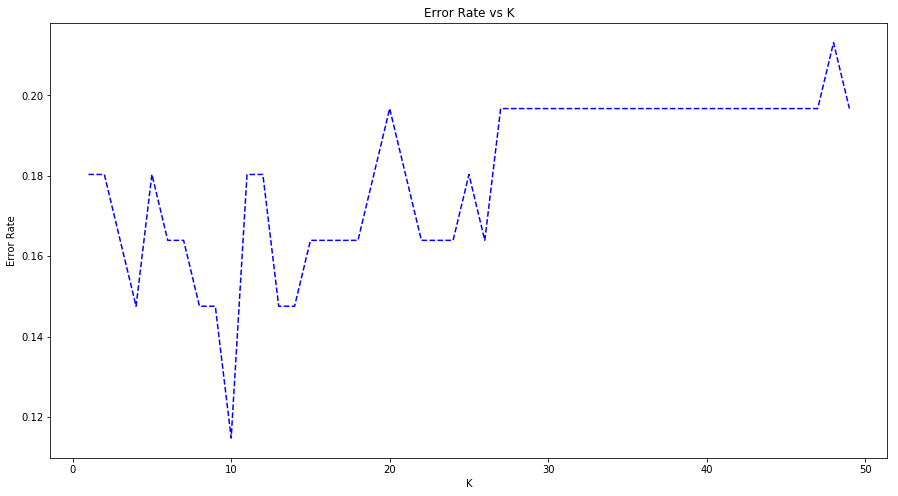

In [85]:
plt.figure(figsize=(15,8))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed')
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retraining model with ideal 'k' value

In [86]:
#K=10
classification = KNeighborsClassifier(n_neighbors=10)
classification.fit(X_train,y_train)
predictions = classification.predict(X_test)

In [87]:
print(accuracy_score(y_test, predictions))


0.8852459016393442


#### Our model performs better now